
# Week 12

## Logistic Regression

# Jupyter Example 1

## Simple Logistic Regression

### Data Preparation

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 220, 220, 220

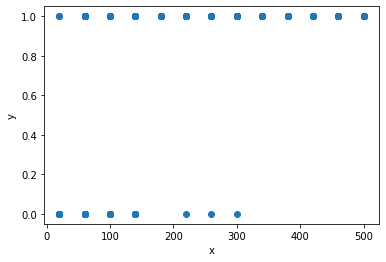

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1=pd.read_excel("heartAttack.xlsx")
#print(df1)
# loop through file
xList=[]
yList=[]
for ind in df1.index:
    x=df1['x'][ind]
    successes=df1['y'][ind]
    failures=df1['y_prime'][ind]
    for i in range (successes):
        xList.append(x)
        yList.append(1.0)
    for i in range(failures):
        xList.append(x)
        yList.append(00.0)
print(xList)   
print(yList)
print(len(xList))
print(sum(yList))
#
plt.plot(xList,yList,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Jupyter Example 2

## Simple Logistic Regression

### Analysis

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


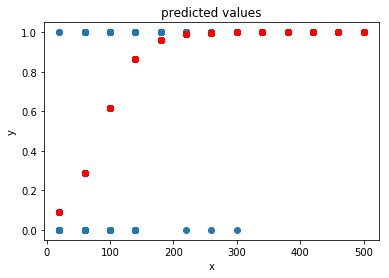

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import log_loss

xArray=np.asarray(xList).reshape(-1,1)
yArray=np.asarray(yList)
logReg1=LogisticRegression(C=1e5).fit(xArray,yArray)
pred1=logReg1.predict_proba(xArray)
pred1_success=pred1[:,1]
plt.plot(xArray,yArray,'o')
plt.plot(xArray,pred1[:,1],'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('predicted values')
plt.show()


In [3]:
# logistic regression using statsmodels
#import statsmodels.api as sm
#from statsmodels.formula.api import logit, probit, poisson, ols
#
#exog=sm.tools.tools.add_constant(xArray,prepend=True)
#model2=sm.Logit(yArray,exog)
#result=model2.fit()
#print(result.summary())

In [4]:
print("The value of the y-intercept term is %f"%logReg1.intercept_)
print("The value of the slope term is %f"%logReg1.coef_)
print("The value of the maximum likelihood function is -%f"%log_loss(yArray,pred1,normalize=False))

The value of the y-intercept term is -2.989259
The value of the slope term is 0.034729
The value of the maximum likelihood function is -93.892126


# Jupyter Example 3

## Simple Logistic Regression

### Inference

In [5]:
# inference
import math
from scipy.stats import chi2

n1=np.sum(yArray)
complementY=1.0-yArray
n0=np.sum(complementY)
pred2=logReg1.predict_log_proba(xArray) # natural log taken
pred2_success=pred2[:,1]
G=0
for i in range(0,len(pred2_success)):
    G=G+yArray[i]*pred2[i,1]+(1.0-yArray[i])*pred2[i,0]
G=G-(n1*math.log(n1)+n0*math.log(n0)-(n0+n1)*math.log(n0+n1))
G=G*2.0
print("n1=%d"%n1)
print("n0=%d"%n0)
print("G=%f"%G)
alpha=.05
cs_alpha=chi2.isf(alpha,1)
print("The critical value of a chi-square variable with 1 degree freedom and alpha=%f is %f"%(alpha,cs_alpha))
#print(pred2_success)

n1=230
n0=130
G=283.135211
The critical value of a chi-square variable with 1 degree freedom and alpha=0.050000 is 3.841459
